In [2]:
!pip install numpy 

  Using cached numpy-2.2.6-cp311-cp311-macosx_14_0_arm64.whl.metadata (62 kB)
Using cached numpy-2.2.6-cp311-cp311-macosx_14_0_arm64.whl (5.4 MB)

[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_excel("Data/E Commerce Dataset.xlsx",sheet_name="E Comm")
df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


Understanding the dataset 

In [3]:
df.shape

(5630, 20)

In [4]:
df.duplicated().sum()

np.int64(0)

In [5]:
df.isnull().sum()

CustomerID                       0
Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64

In [6]:
df.dtypes

CustomerID                       int64
Churn                            int64
Tenure                         float64
PreferredLoginDevice            object
CityTier                         int64
WarehouseToHome                float64
PreferredPaymentMode            object
Gender                          object
HourSpendOnApp                 float64
NumberOfDeviceRegistered         int64
PreferedOrderCat                object
SatisfactionScore                int64
MaritalStatus                   object
NumberOfAddress                  int64
Complain                         int64
OrderAmountHikeFromlastYear    float64
CouponUsed                     float64
OrderCount                     float64
DaySinceLastOrder              float64
CashbackAmount                 float64
dtype: object


From the preliminary Data set we can see that there are certain missing values. There are no duplicate entries.

There are 5630 rows and 20 columns.

Looking at the Data types, it doesnt look like there's any anomaly in the values in the dataset.

Checking for the Data Hygiene in the dataset -> Lets see the value counts of each of the categorical variables

In [7]:
for i in df.columns:
    if df[i].dtypes=="object":
        print(i)
        print()
        print('the values are:')
        print(df[i].value_counts())
        print()
        print()

PreferredLoginDevice

the values are:
PreferredLoginDevice
Mobile Phone    2765
Computer        1634
Phone           1231
Name: count, dtype: int64


PreferredPaymentMode

the values are:
PreferredPaymentMode
Debit Card          2314
Credit Card         1501
E wallet             614
UPI                  414
COD                  365
CC                   273
Cash on Delivery     149
Name: count, dtype: int64


Gender

the values are:
Gender
Male      3384
Female    2246
Name: count, dtype: int64


PreferedOrderCat

the values are:
PreferedOrderCat
Laptop & Accessory    2050
Mobile Phone          1271
Fashion                826
Mobile                 809
Grocery                410
Others                 264
Name: count, dtype: int64


MaritalStatus

the values are:
MaritalStatus
Married     2986
Single      1796
Divorced     848
Name: count, dtype: int64




The variables above look fine hence there is no need to do anything from the perspective of data hygiene

Handling the missing values

In [8]:
df1=df.copy()

In [9]:
df.drop(['CustomerID'],axis=1,inplace=True)

Lets first single out those variables where there are missing values:

In [12]:
for i in df.columns:
    if df[i].isnull().sum()>0:
        print(i)
        print("Total Null Values are:",df[i].isnull().sum())
        print("the datatype is" , df[i].dtypes)
        print()

Tenure
Total Null Values are: 264
the datatype is float64

WarehouseToHome
Total Null Values are: 251
the datatype is float64

HourSpendOnApp
Total Null Values are: 255
the datatype is float64

OrderAmountHikeFromlastYear
Total Null Values are: 265
the datatype is float64

CouponUsed
Total Null Values are: 256
the datatype is float64

OrderCount
Total Null Values are: 258
the datatype is float64

DaySinceLastOrder
Total Null Values are: 307
the datatype is float64



In [14]:
df["Churn"]=df["Churn"].astype('object')
df['CityTier']=df['CityTier'].astype('object')


In [15]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Tenure,5366.0,10.189899,8.557241,0.0,2.00,9.00,16.0000,61.00
WarehouseToHome,5379.0,15.639896,8.531475,5.0,9.00,14.00,20.0000,127.00
HourSpendOnApp,5375.0,2.931535,0.721926,0.0,2.00,3.00,3.0000,5.00
NumberOfDeviceRegistered,5630.0,3.688988,1.023999,1.0,3.00,4.00,4.0000,6.00
SatisfactionScore,5630.0,3.066785,1.380194,1.0,2.00,3.00,4.0000,5.00
NumberOfAddress,5630.0,4.214032,2.583586,1.0,2.00,3.00,6.0000,22.00
Complain,5630.0,0.284902,0.451408,0.0,0.00,0.00,1.0000,1.00
OrderAmountHikeFromlastYear,5365.0,15.707922,3.675485,11.0,13.00,15.00,18.0000,26.00
CouponUsed,5374.0,1.751023,1.894621,0.0,1.00,1.00,2.0000,16.00
OrderCount,5372.0,3.008004,2.939680,1.0,1.00,2.00,3.0000,16.00



First lets go about filling the missing values by the median values -> Mean and median values are very close for all the above variables hence we will prefer filling the median values.

In [16]:
for i in df.columns:
    if df[i].isnull().sum()>0:
        df[i].fillna(df[i].median(),inplace=True)

/var/folders/j9/2xjjcspd5r3dz1m4ll_0c7m80000gn/T/ipykernel_3631/2079272497.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[i].fillna(df[i].median(),inplace=True)
/var/folders/j9/2xjjcspd5r3dz1m4ll_0c7m80000gn/T/ipykernel_3631/2079272497.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behave

In [17]:
df.isnull().sum()

Churn                          0
Tenure                         0
PreferredLoginDevice           0
CityTier                       0
WarehouseToHome                0
PreferredPaymentMode           0
Gender                         0
HourSpendOnApp                 0
NumberOfDeviceRegistered       0
PreferedOrderCat               0
SatisfactionScore              0
MaritalStatus                  0
NumberOfAddress                0
Complain                       0
OrderAmountHikeFromlastYear    0
CouponUsed                     0
OrderCount                     0
DaySinceLastOrder              0
CashbackAmount                 0
dtype: int64

Outlier Treatment

We will now treat outliers. For this we will define the lower range and upper range which is going to be at a distnace of 1.5 times the Interquartile range from the respective whiskers

Text(0, 0.5, 'Values')

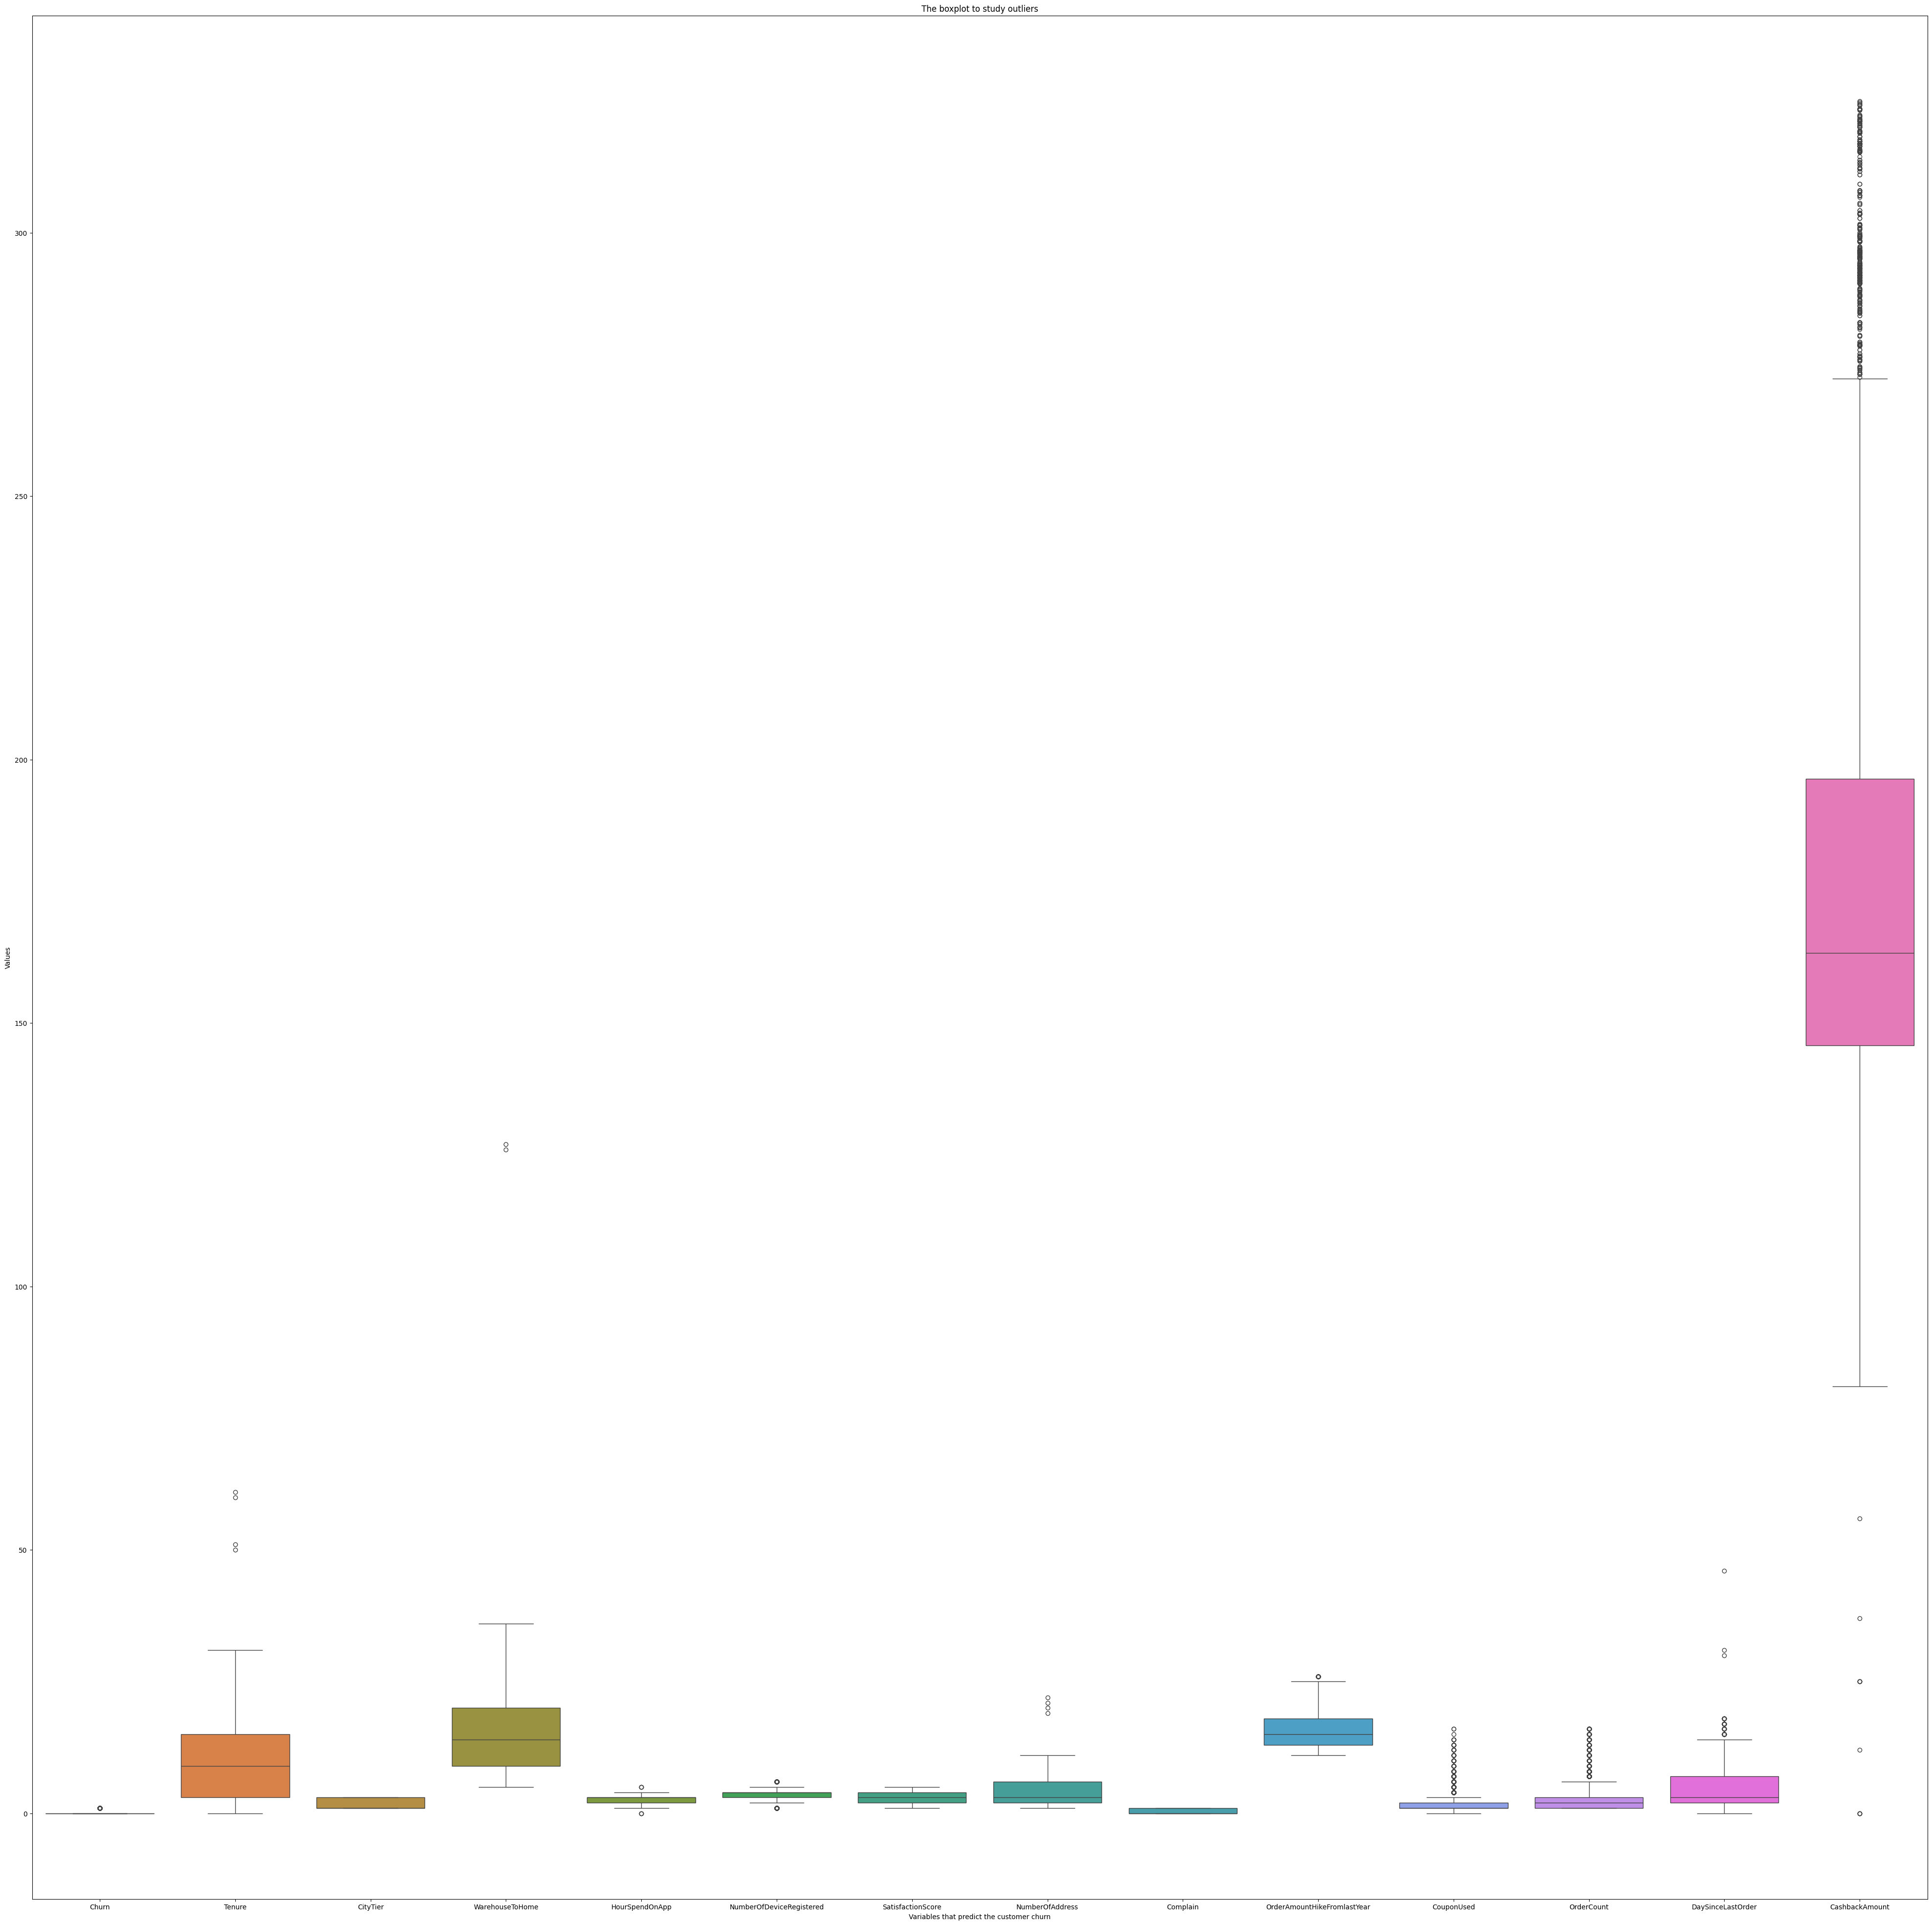

In [20]:
plt.figure(figsize=(50,50))
sns.boxplot(data=df)
plt.title('The boxplot to study outliers')
plt.xlabel('Variables that predict the customer churn')
plt.ylabel('Values')

Here we can see that there are quite a lot of outliers in almost all of the variables. Lets treat these outliers

In [21]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lr=Q1-(1.5*IQR)
    ur=Q3+(1.5*IQR)
    return lr,ur

In [22]:
for column in df.columns:
    if df[column].dtype!='object':
        lr,ur=remove_outlier(df[column])
        df[column]=np.where(df[column]>ur,ur,df[column])
        df[column]=np.where(df[column]<lr,lr,df[column])


Text(0, 0.5, 'Values')

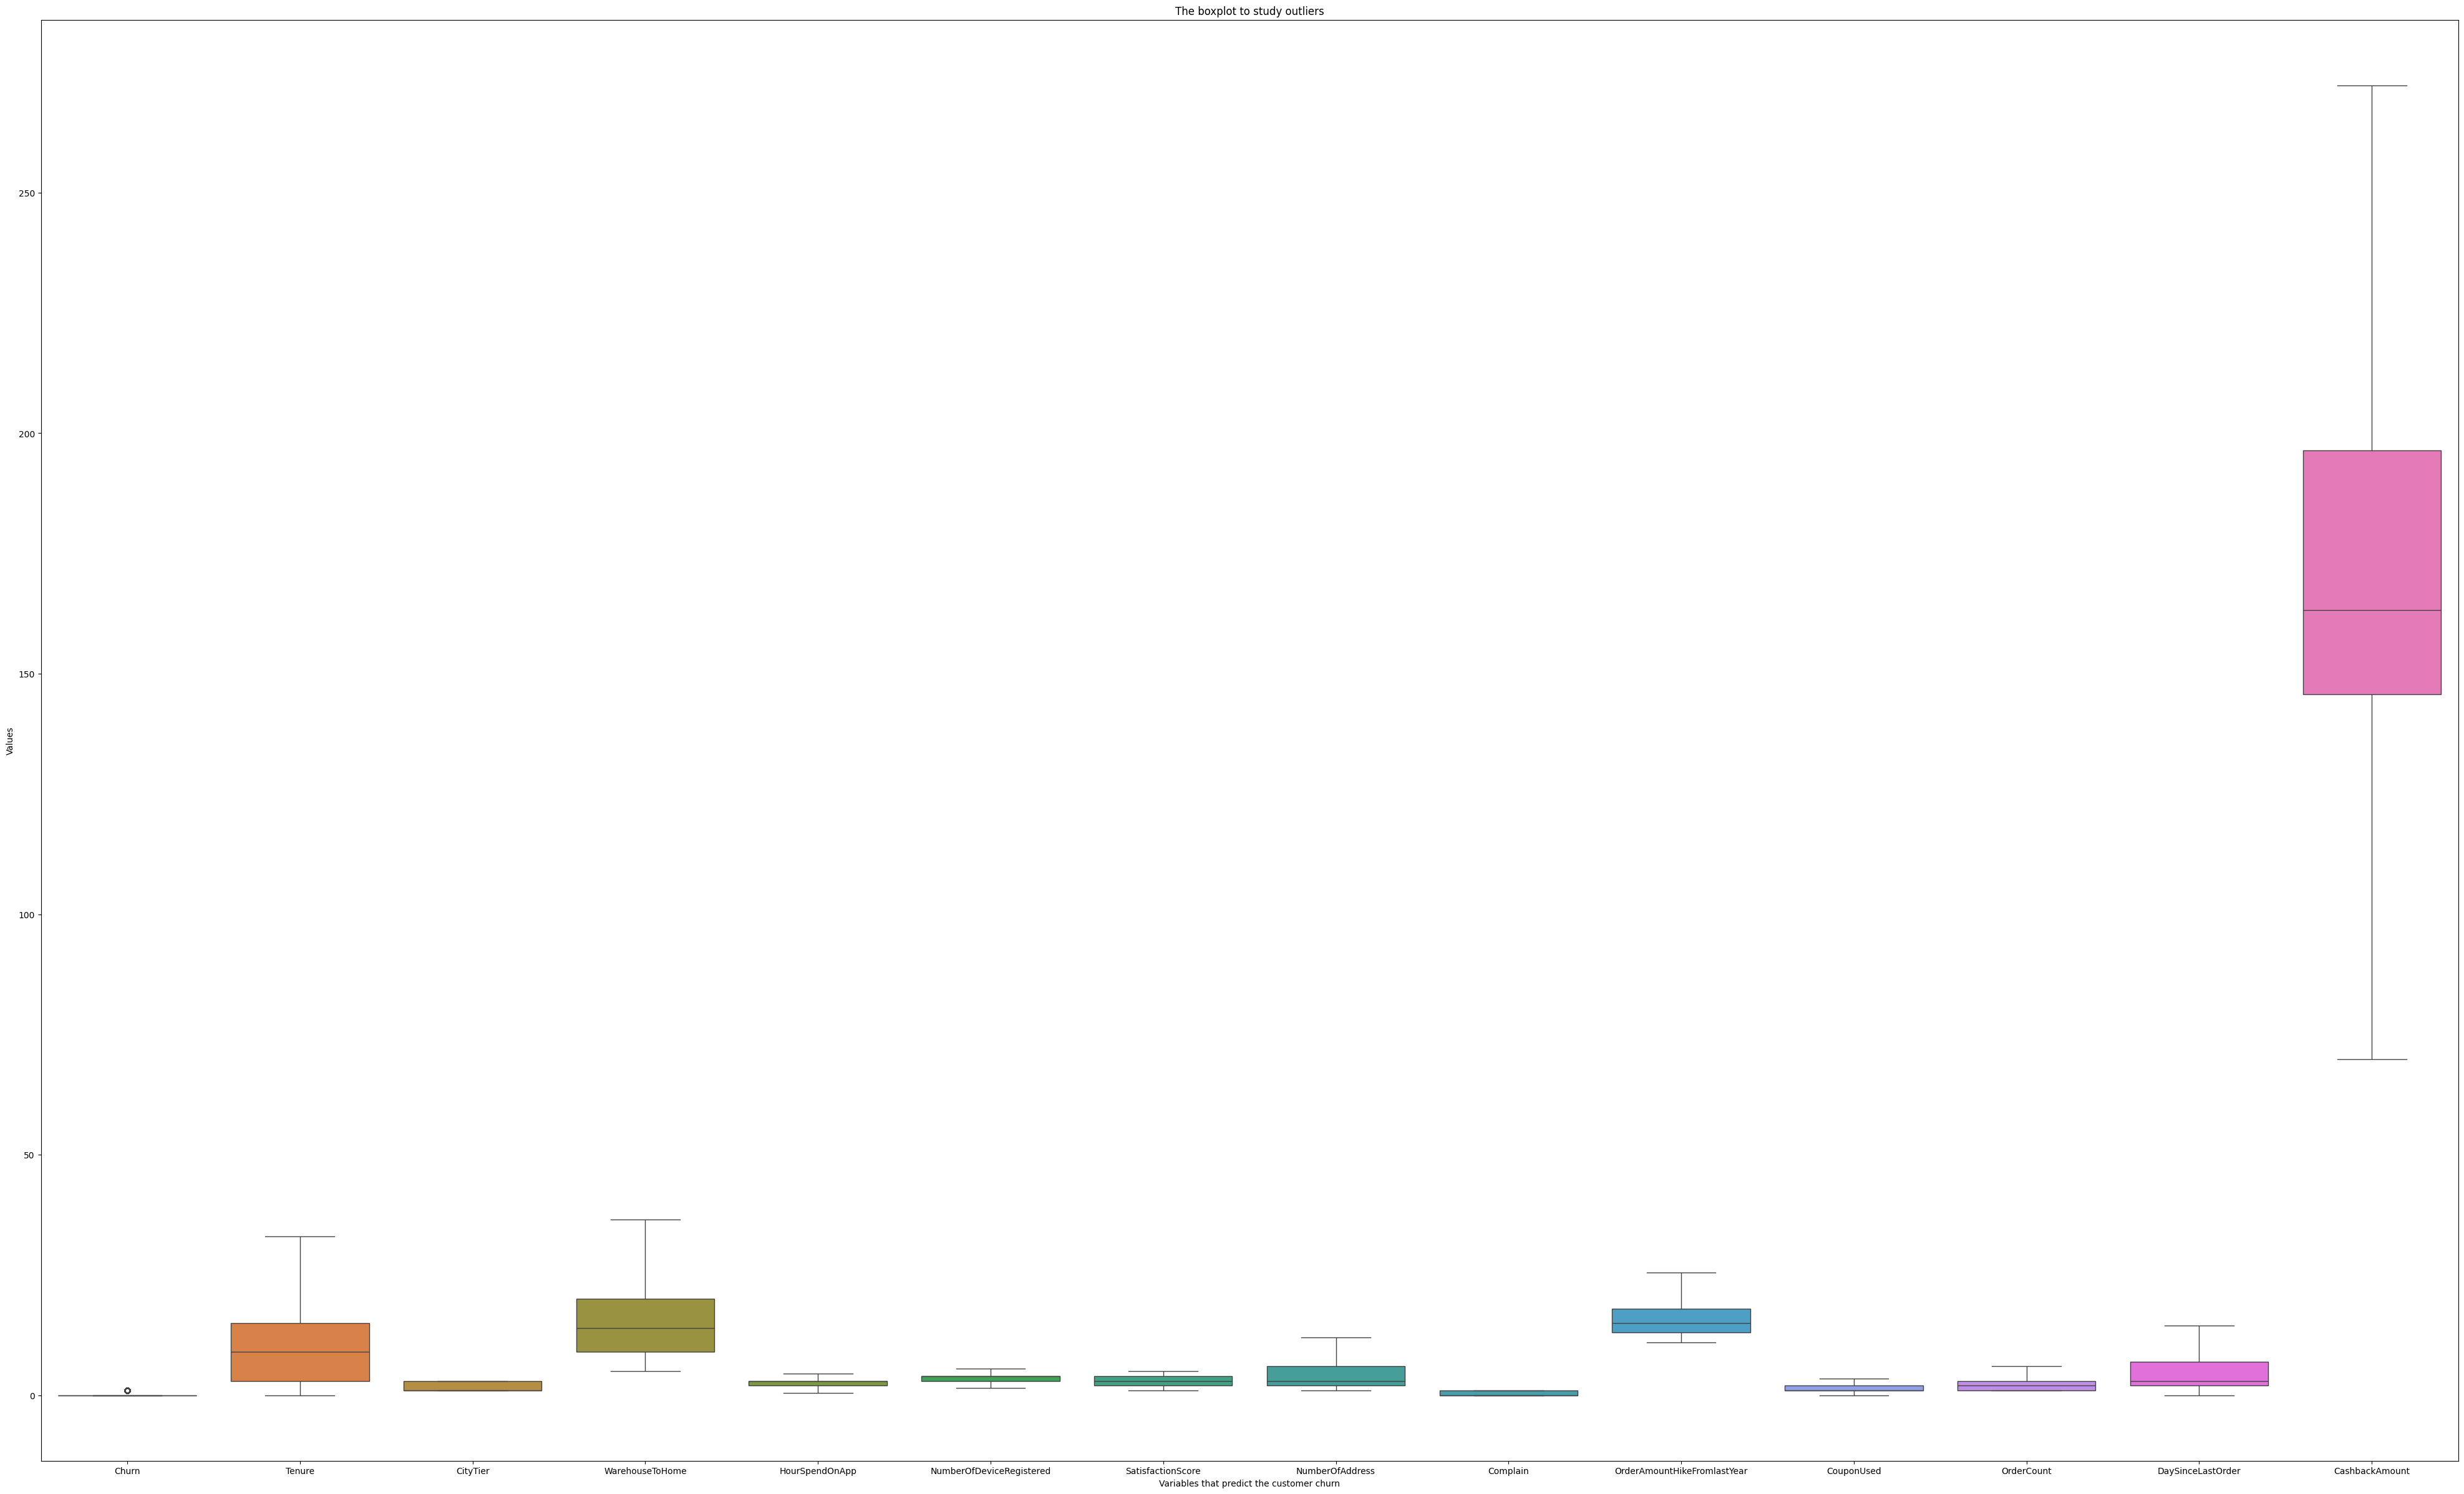

In [24]:
plt.figure(figsize=(50,30))
sns.boxplot(data=df)
plt.title("The boxplot to study outliers")
plt.xlabel('Variables that predict the customer churn')
plt.ylabel('Values')

Here we can see that we have treated all the outliers. The outliers are now replaced with their corresponding upper range or lower range values

Feature Engineering - Adding new variables

In [25]:
df["avg_cashbk_per_oreder"]=df["CashbackAmount"]/df["OrderCount"]

In [29]:
#percentage of customer churn 
Churn_perc=round((df['Churn'][df["Churn"]==1].count()*100/df["Churn"][df['Churn']==0].count()),2)

In [30]:
print('The average customer churn is:', Churn_perc,'%')

The average customer churn is: 20.25 %


Exploratory Data Analysis

1. The Univariate Analysis


In [31]:
categorical =[]
numerical=[]

for i in df.columns:
    if df[i].dtype=='object':
        categorical.append(i)
    else:
        numerical.append(i)

print('cat= ', categorical)
print('num= ', numerical)


cat=  ['Churn', 'PreferredLoginDevice', 'CityTier', 'PreferredPaymentMode', 'Gender', 'PreferedOrderCat', 'MaritalStatus']
num=  ['Tenure', 'WarehouseToHome', 'HourSpendOnApp', 'NumberOfDeviceRegistered', 'SatisfactionScore', 'NumberOfAddress', 'Complain', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount', 'DaySinceLastOrder', 'CashbackAmount', 'avg_cashbk_per_oreder']


In [32]:
df[categorical].describe().T

,count,unique,top,freq
Churn,5630,2,0,4682
PreferredLoginDevice,5630,3,Mobile Phone,2765
CityTier,5630,3,1,3666
PreferredPaymentMode,5630,7,Debit Card,2314
Gender,5630,2,Male,3384
PreferedOrderCat,5630,6,Laptop & Accessory,2050
MaritalStatus,5630,3,Married,2986


In [33]:
for i in categorical:
    print(i)
    print()
    print(df[i].value_counts())
    print()
    print()

Churn

Churn
0    4682
1     948
Name: count, dtype: int64


PreferredLoginDevice

PreferredLoginDevice
Mobile Phone    2765
Computer        1634
Phone           1231
Name: count, dtype: int64


CityTier

CityTier
1    3666
3    1722
2     242
Name: count, dtype: int64


PreferredPaymentMode

PreferredPaymentMode
Debit Card          2314
Credit Card         1501
E wallet             614
UPI                  414
COD                  365
CC                   273
Cash on Delivery     149
Name: count, dtype: int64


Gender

Gender
Male      3384
Female    2246
Name: count, dtype: int64


PreferedOrderCat

PreferedOrderCat
Laptop & Accessory    2050
Mobile Phone          1271
Fashion                826
Mobile                 809
Grocery                410
Others                 264
Name: count, dtype: int64


MaritalStatus

MaritalStatus
Married     2986
Single      1796
Divorced     848
Name: count, dtype: int64




In [34]:
df[numerical].describe().T

,count,mean,std,min,25%,50%,75%,max
Tenure,5630.0,10.118117,8.291334,0.000000,3.000000,9.00,15.0000,33.00000
WarehouseToHome,5630.0,15.534813,8.089328,5.000000,9.000000,14.00,20.0000,36.50000
HourSpendOnApp,5630.0,2.934636,0.703826,0.500000,2.000000,3.00,3.0000,4.50000
NumberOfDeviceRegistered,5630.0,3.695471,0.942015,1.500000,3.000000,4.00,4.0000,5.50000
SatisfactionScore,5630.0,3.066785,1.380194,1.000000,2.000000,3.00,4.0000,5.00000
NumberOfAddress,5630.0,4.207993,2.555111,1.000000,2.000000,3.00,6.0000,12.00000
Complain,5630.0,0.284902,0.451408,0.000000,0.000000,0.00,1.0000,1.00000
OrderAmountHikeFromlastYear,5630.0,15.671670,3.582823,11.000000,13.000000,15.00,18.0000,25.50000
CouponUsed,5630.0,1.440409,1.071295,0.000000,1.000000,1.00,2.0000,3.50000
OrderCount,5630.0,2.520604,1.711109,1.000000,1.000000,2.00,3.0000,6.00000


array([[<Axes: title={'center': 'Tenure'}>,
        <Axes: title={'center': 'WarehouseToHome'}>,
        <Axes: title={'center': 'HourSpendOnApp'}>,
        <Axes: title={'center': 'NumberOfDeviceRegistered'}>],
       [<Axes: title={'center': 'SatisfactionScore'}>,
        <Axes: title={'center': 'NumberOfAddress'}>,
        <Axes: title={'center': 'Complain'}>,
        <Axes: title={'center': 'OrderAmountHikeFromlastYear'}>],
       [<Axes: title={'center': 'CouponUsed'}>,
        <Axes: title={'center': 'OrderCount'}>,
        <Axes: title={'center': 'DaySinceLastOrder'}>,
        <Axes: title={'center': 'CashbackAmount'}>],
       [<Axes: title={'center': 'avg_cashbk_per_oreder'}>, <Axes: >,
        <Axes: >, <Axes: >]], dtype=object)

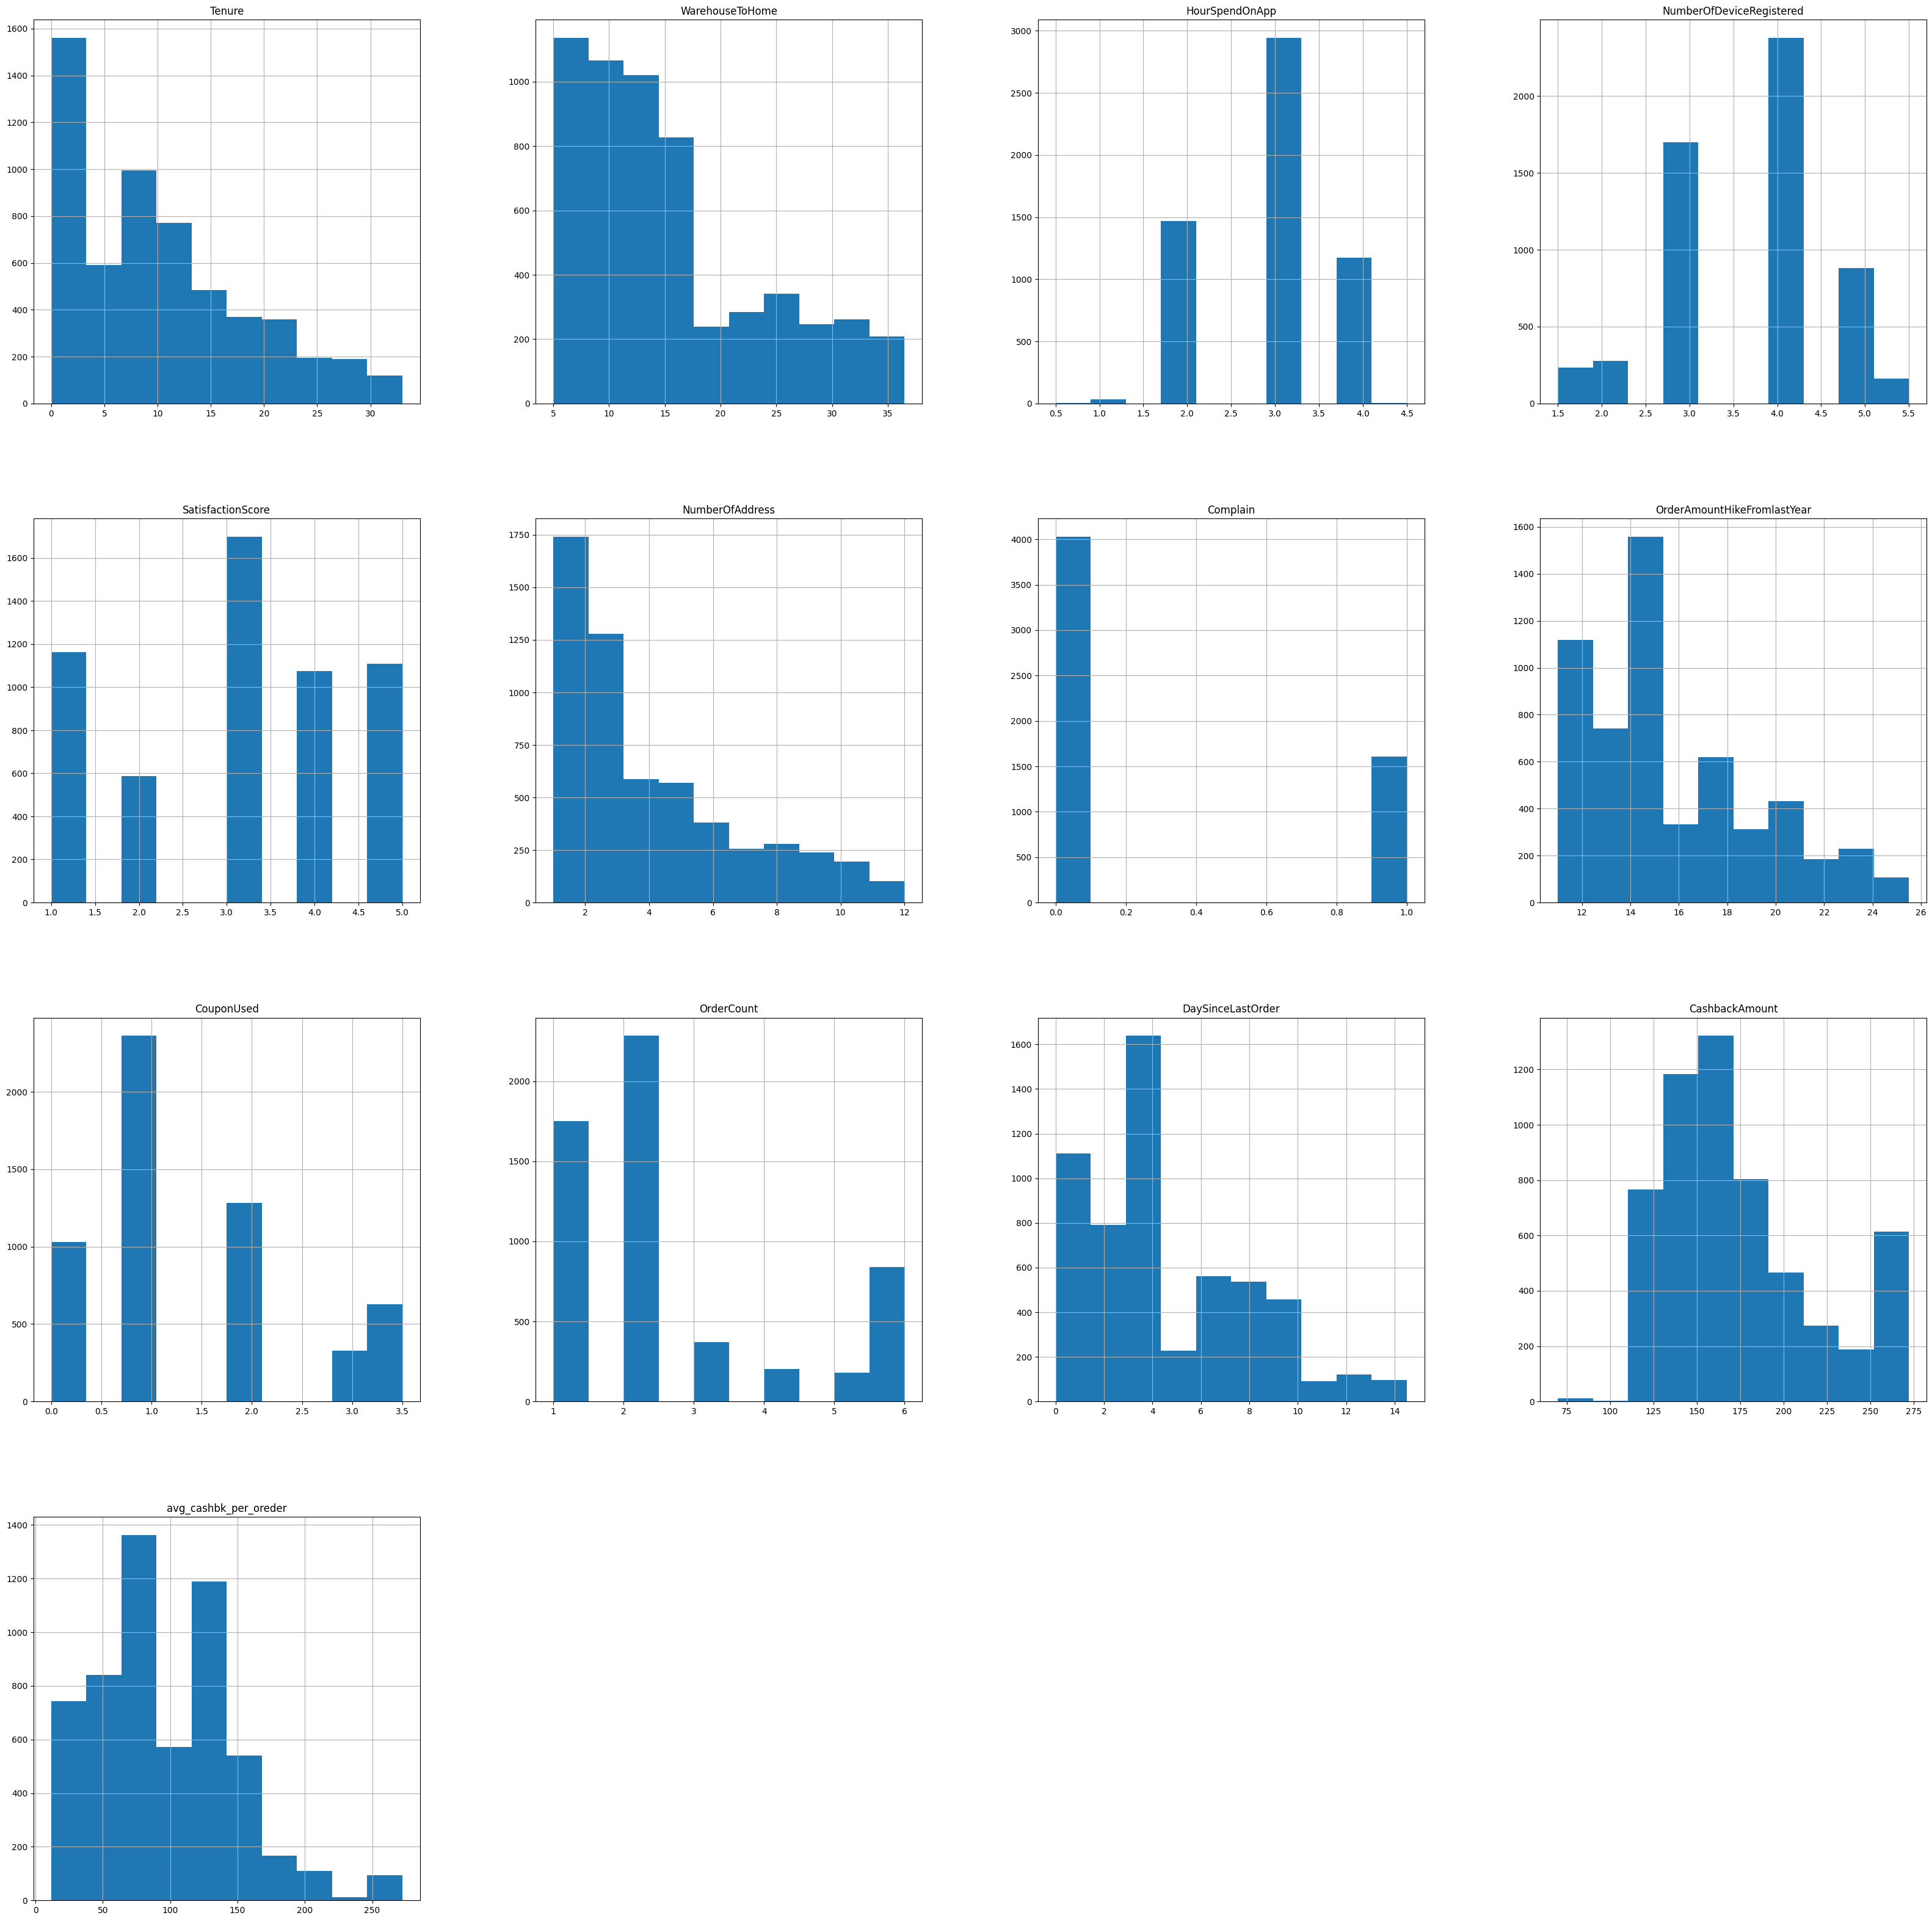

In [35]:
df[numerical].hist(figsize=(40,40))

/Users/suryasadasivam/DataScience /project/customer churn /venv/lib/python3.11/site-packages/seaborn/distributions.py:2125: UserWarning: `displot` is a figure-level function and does not accept the ax= parameter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)
/Users/suryasadasivam/DataScience /project/customer churn /venv/lib/python3.11/site-packages/seaborn/distributions.py:2125: UserWarning: `displot` is a figure-level function and does not accept the ax= parameter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)
/Users/suryasadasivam/DataScience /project/customer churn /venv/lib/python3.11/site-packages/seaborn/distributions.py:2125: UserWarning: `displot` is a figure-level function and does not accept the ax= parameter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)
/Users/suryasadasivam/DataScience /project/customer churn /venv/lib/python3.11/site-packages/seaborn/distributions.py:2125: UserWarning: `displot` is a figure-level func

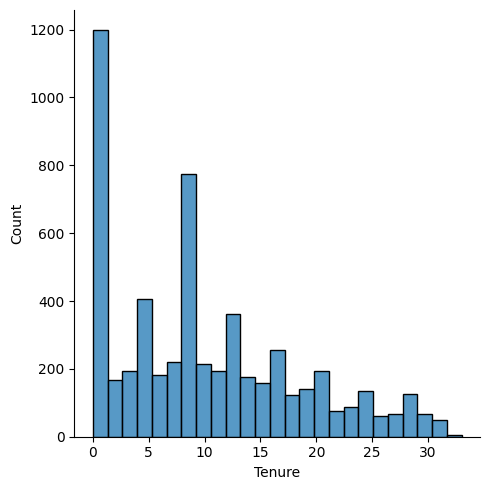

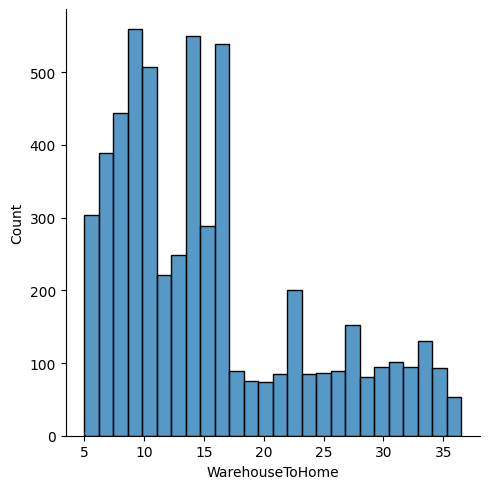

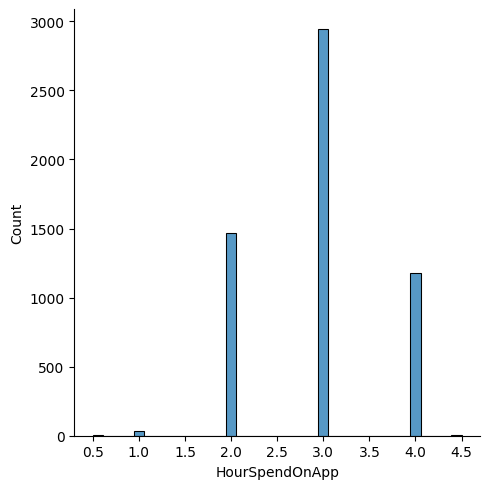

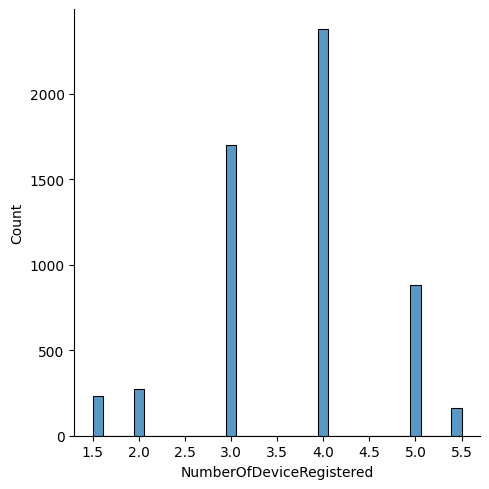

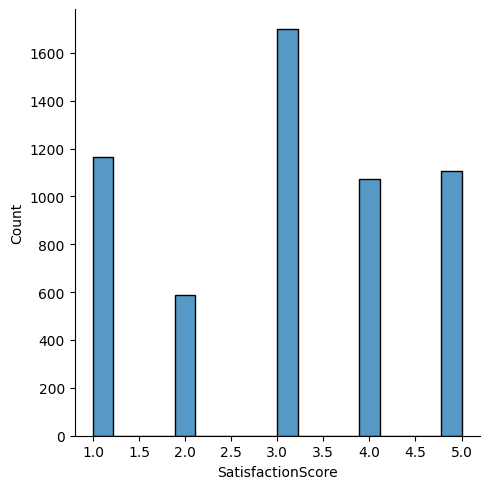

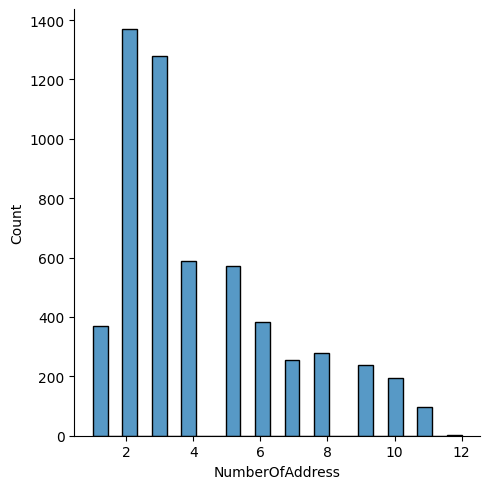

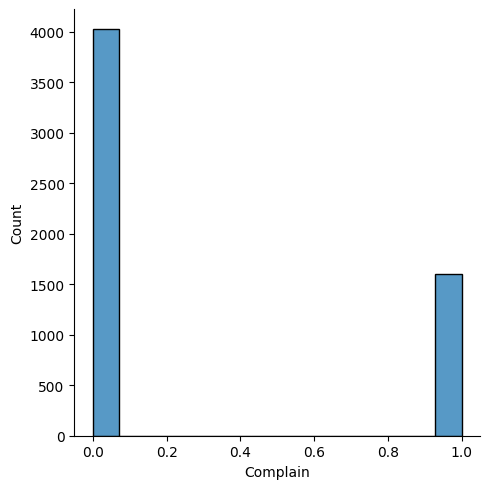

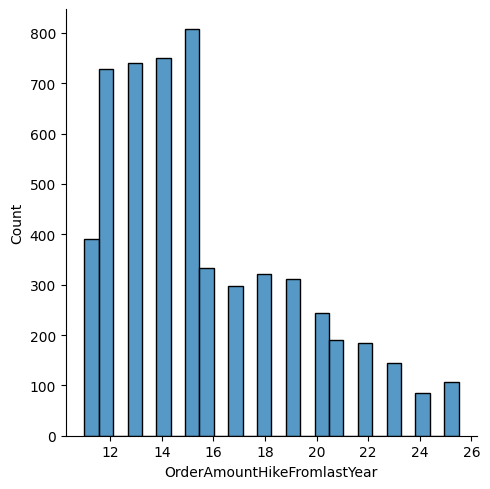

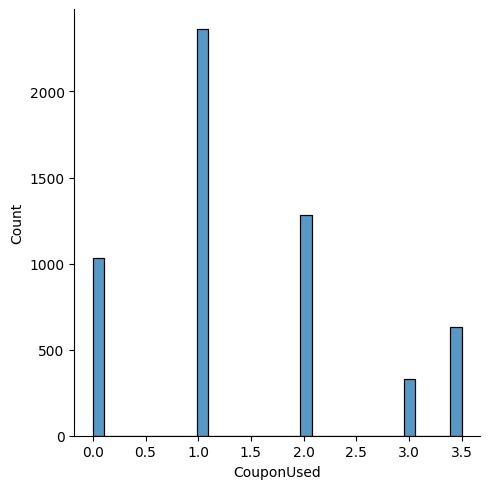

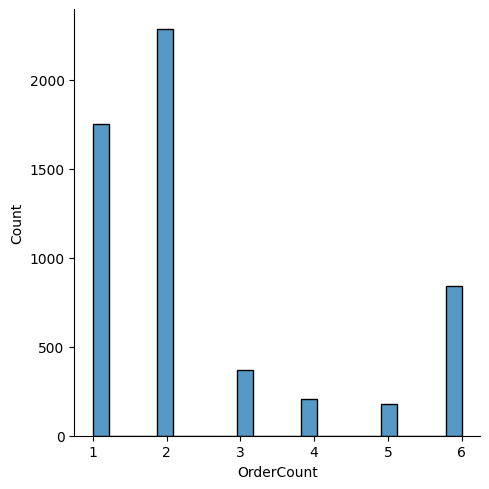

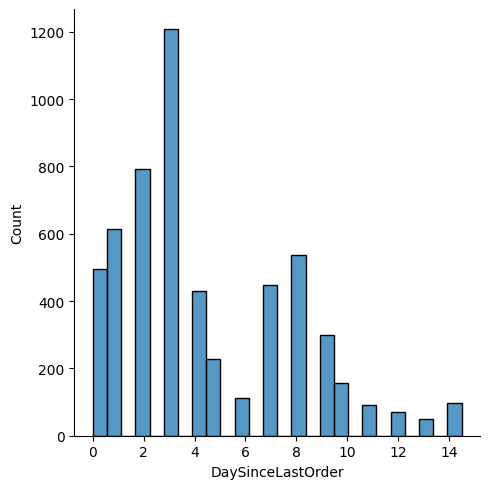

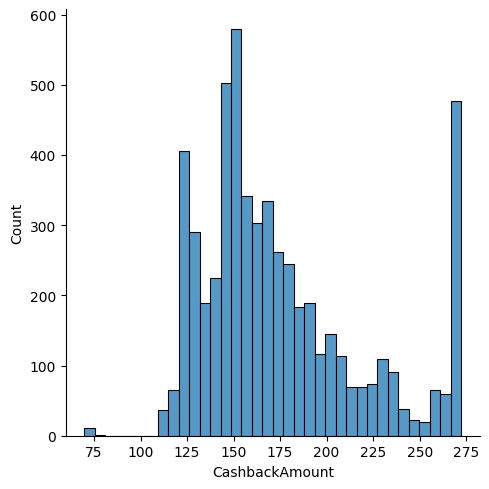

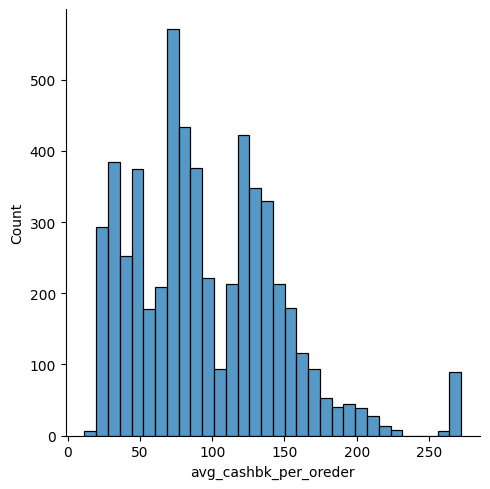

In [37]:

for i, subplot in zip(numerical,ax.flatten()):
    sns.displot(df[i],ax=subplot)

In [41]:
d = {}
for i in df.columns:
    if i == "Churn":
        continue  
    churn_sum = df.groupby(i)['Churn'].sum()
    total_counts = df[i].value_counts()
    perc = round(churn_sum * 100 / total_counts, 2)

    temp_df = pd.concat([churn_sum, total_counts, perc], axis=1)
    temp_df.reset_index(inplace=True)
    temp_df = temp_df.rename(columns={i: i, 'Churn': 'Customer_churned', 'count': 'Total_Customers', 0: 'perc_of_total_cust'})

    d[i] = temp_df

In [43]:
for i in df.columns:
    if i == "Churn":
        continue  
    print(i)
    print(d[i])
    print()

Tenure
    Tenure Customer_churned  Total_Customers perc_of_total_cust
0      0.0              272              508          53.543307
1      1.0              349              690           50.57971
2      2.0               14              167           8.383234
3      3.0               18              195           9.230769
4      4.0               20              203           9.852217
5      5.0               16              204           7.843137
6      6.0                8              183           4.371585
7      7.0               16              221           7.239819
8      8.0               16              263            6.08365
9      9.0               93              511          18.199609
10    10.0               14              213            6.57277
11    11.0               10              194           5.154639
12    12.0                7              182           3.846154
13    13.0               13              181            7.18232
14    14.0               14      

In [46]:
def analysis_chart(variable):
    plt.figure(figsize=(20,12))
    fig,ax=plt.subplots()

    title1='Customers Churn analysed by' + variable
    plt.title(title1)

    line1=ax.plot(d[variable][variable],d[variable]['Customer_churned'],color='lightskyblue',label='Customers')
    line2=ax.plot(d[variable][variable],d[variable]['Total_Customers'],color='dodgerblue',label='Total Customers')
    plt.xlabel(variable)
    plt.ylabel('No.of customers')

    for tick in ax.get_xticklabels():
        tick.set_rotation(45)
    
    ax2=ax.twinx()

    line3=ax2.plot(d[variable][variable],d[variable]['perc_of_total_cust'],color='yellowgreen',label='churn as percent of total')
    y=0*d[variable]['perc_of_total_cust']+20.25
    line4=ax2.plot(d[variable][variable],y,color='orangered',label="Average customer churn", linestyle='dashed')

    plt.ylabel('percentage of customers churned')

    lines=line1+line2+line3+line4

    labs=[l.get_label() for l in lines]
    ax.legend(lines,labs,bbox_to_anchor=(1.7,1))

    sns.despine(ax=ax,right=True, left=True)
    sns.despine(ax=ax2,left=True,right=False)

<Figure size 2000x1200 with 0 Axes>

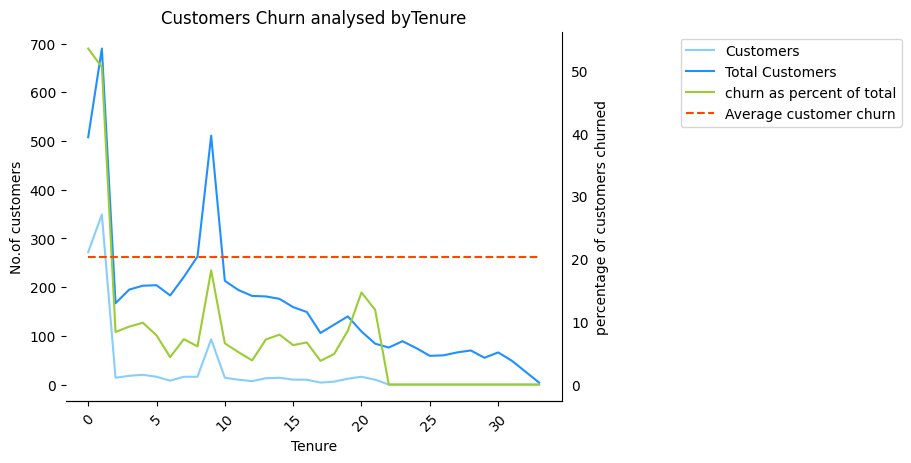

In [47]:
analysis_chart('Tenure')

<Figure size 2000x1200 with 0 Axes>

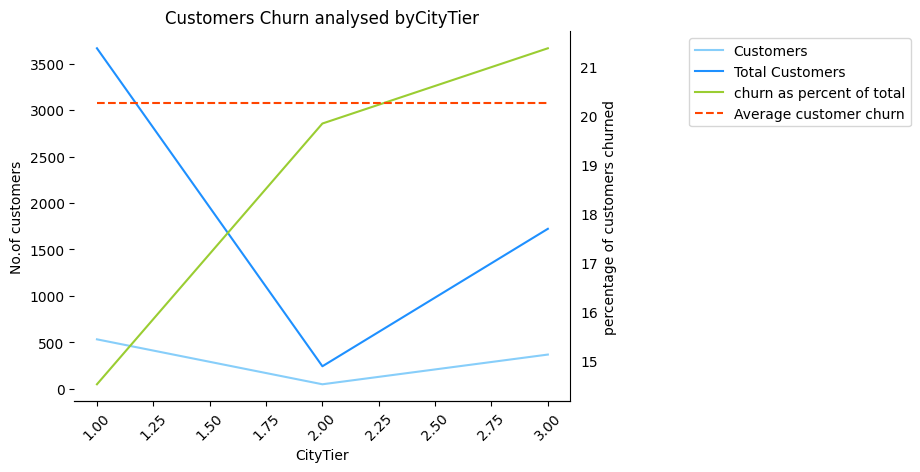

In [48]:
analysis_chart('CityTier')

<Figure size 2000x1200 with 0 Axes>

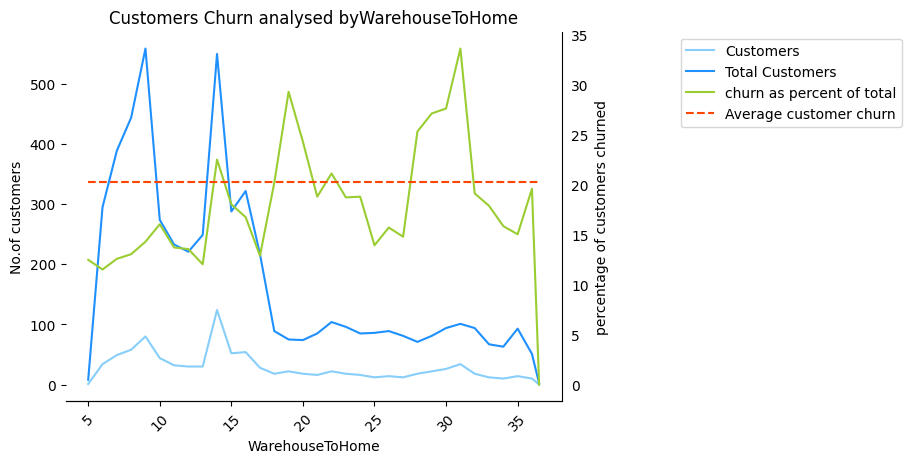

In [49]:
analysis_chart("WarehouseToHome")